El dataset ofrece diferentes variables para poder predecir que tan propenso se es a tener un "Stroke" o mejor conocido, ataque cerebrovascular. Entre las variables con las que se cuenta se tienen datos de enfermedades de la persona (si tiene problemas de corazón o no y si tiene hipertensión), de igual manera, se proporciona un dato para saber si ya ha presentado ataques cerebrovasculares.(COMPLEMENTAR)

##Preprocesamiento 


In [29]:
##Se importan las librerias a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [30]:
## Cargamos el dataset
df = pd.read_csv('Data/healthcare-dataset-stroke-data.csv')

##Visualizar la cantidad de registros y columnas del dataset
print(f"El dataset tiene {df.shape}")

##Visualizar las primeras filas del dataset
print(f"Primeras filas del dataset:\n{df.head(10)}")




El dataset tiene (5110, 12)
Primeras filas del dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural          

In [31]:

##Visualizar las estadísticas descriptivas del dataset
print("---------------------:)------------------------")
print(f"Estadísticas descriptivas del dataset:\n{df.describe()}")


---------------------:)------------------------
Estadísticas descriptivas del dataset:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%      

In [32]:

##Validamos datos nulos y duplicados
print(f"Datos nulos:\n{df.isnull().mean()*100}")

print("---------------------------------------------")
print(f"Datos duplicados:\n{df.duplicated().sum()}")



Datos nulos:
id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
---------------------------------------------
Datos duplicados:
0


GRAFICAS GENERALES DE HISTOGRAMA PARA VER DISTRIBUCION DE DATOS

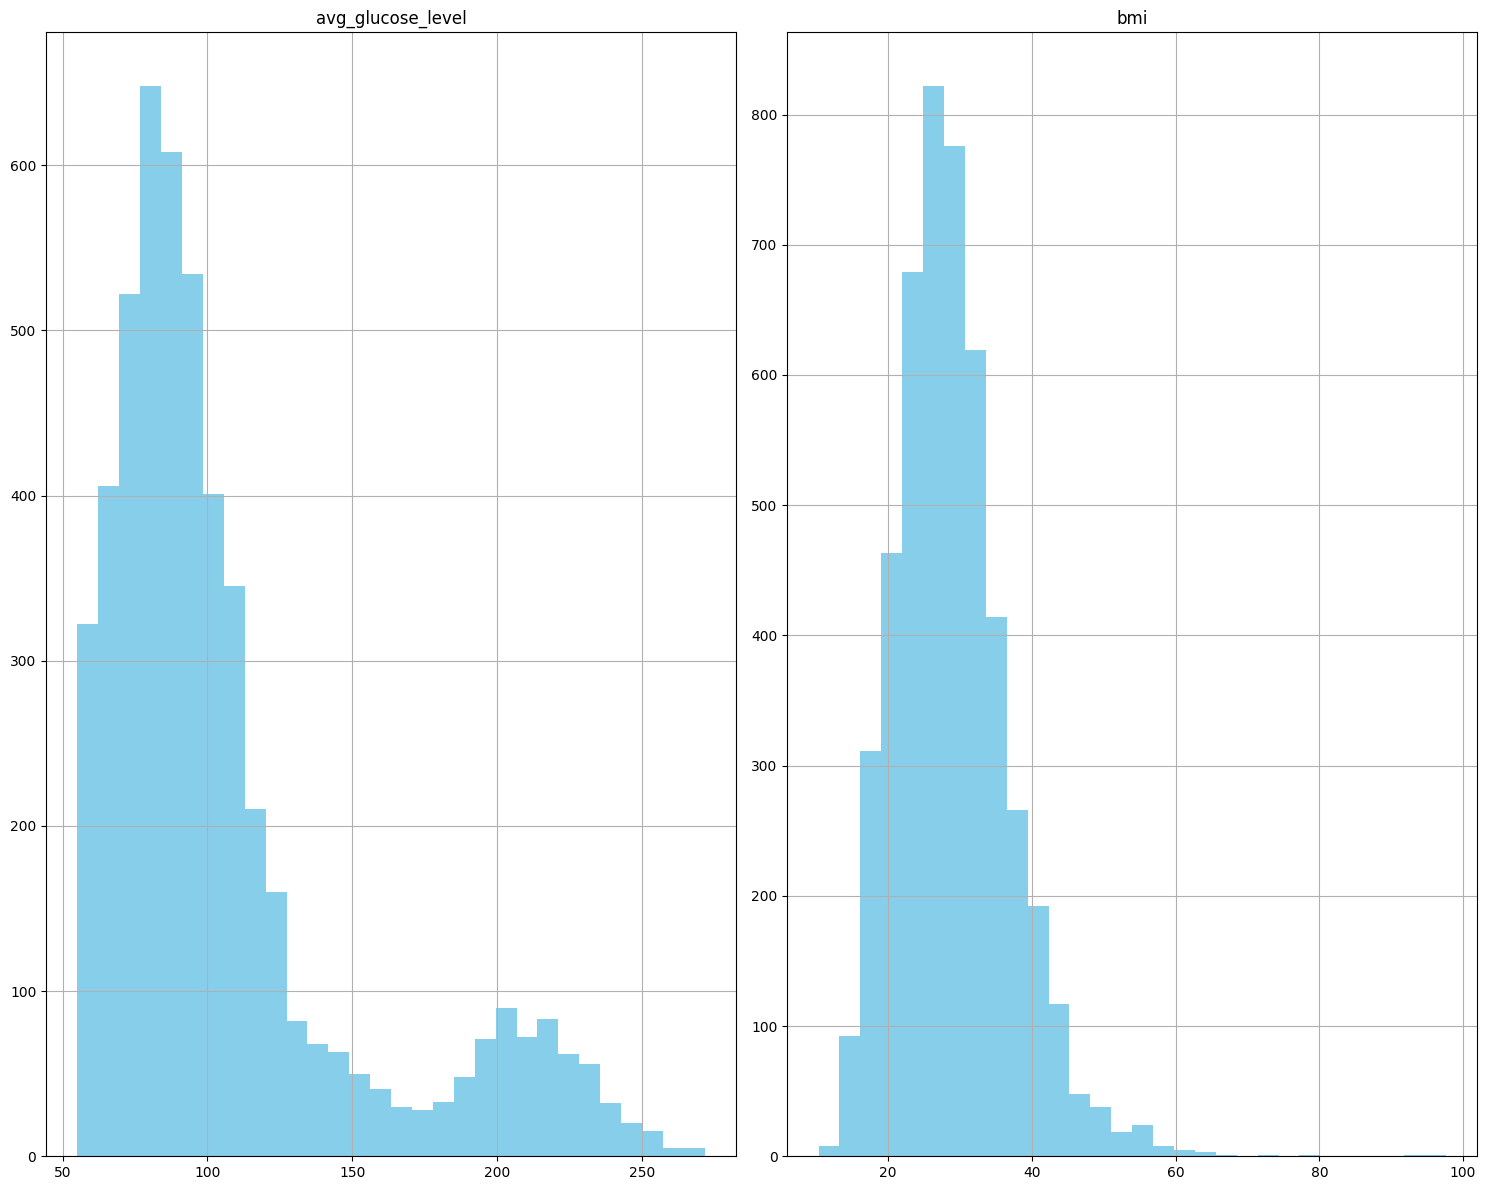

In [33]:
##Se exploran otras variables numericas mediante histograma con el fin de saber como estan distribuidos los datos

##REEMPLAZAR VARIABLES 
numeric_cols = ['avg_glucose_level', 'bmi']

df[numeric_cols].hist(bins=30, figsize=(15,12), color='skyblue')
plt.tight_layout()
plt.show()

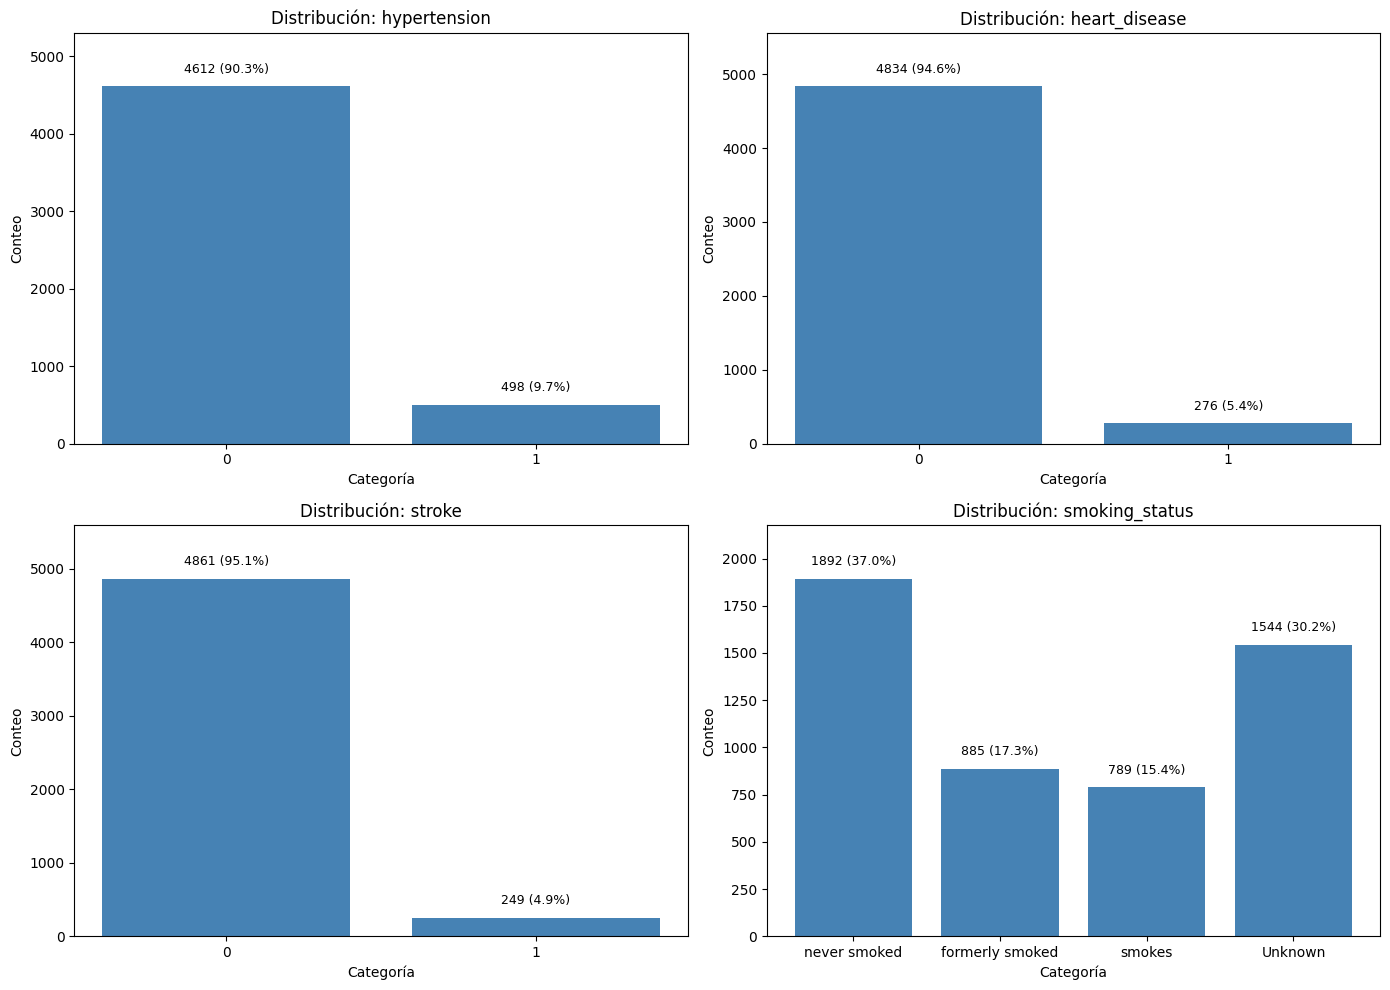


--- hypertension ---
              conteo  porcentaje
hypertension                    
0               4612       90.25
1                498        9.75

--- heart_disease ---
               conteo  porcentaje
heart_disease                    
0                4834        94.6
1                 276         5.4

--- stroke ---
        conteo  porcentaje
stroke                    
0         4861       95.13
1          249        4.87

--- smoking_status ---
                 conteo  porcentaje
smoking_status                     
never smoked       1892       37.03
Unknown            1544       30.22
formerly smoked     885       17.32
smokes              789       15.44


In [34]:
# Conteos y gráficas de variables categóricas solicitadas


# Columnas categóricas a analizar
cat_cols = ['hypertension', 'heart_disease', 'stroke', 'smoking_status']

# Asegurar que 'smoking_status' tenga una categoría para faltantes
if 'smoking_status' in df.columns:
    df['smoking_status'] = df['smoking_status'].fillna('Unknown')


def plot_counts(df, columns):
    total = len(df)
    n = len(columns)
    rows = math.ceil(n / 2)
    cols = 2 if n > 1 else 1

    fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
    if isinstance(axes, np.ndarray):
        axes = axes.ravel()
    else:
        axes = [axes]

    for i, col in enumerate(columns):
        s = df[col].copy()
        # Contar incluyendo valores faltantes (si existieran)
        counts = s.value_counts(dropna=False)

        # Orden sugerido para binarios y para 'smoking_status'
        if col in ['hypertension', 'heart_disease', 'stroke']:
            order = [0, 1]
            counts = counts.reindex(order).fillna(0).astype(int)
            xlabels = [str(x) for x in order]
        elif col == 'smoking_status':
            order = ['never smoked', 'formerly smoked', 'smokes', 'Unknown']
            counts = counts.reindex(order).fillna(0).astype(int)
            xlabels = order
        else:
            xlabels = counts.index.astype(str).tolist()

        ax = axes[i]
        bars = ax.bar(xlabels, counts.values, color='steelblue')
        ax.set_title(f'Distribución: {col}')
        ax.set_ylabel('Conteo')
        ax.set_xlabel('Categoría')
        ax.set_ylim(0, max(counts.values) * 1.15 if len(counts) else 1)

        for bar, val in zip(bars, counts.values):
            pct = (val / total * 100) if total else 0
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() + (max(counts.values) * 0.03 if len(counts) else 0.5),
                f'{val} ({pct:.1f}%)',
                ha='center', va='bottom', fontsize=9
            )

    # Eliminar ejes vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # Imprimir tablas de conteo y porcentaje
    for col in columns:
        s = df[col].copy()
        tbl = s.value_counts(dropna=False).to_frame('conteo')
        tbl['porcentaje'] = (tbl['conteo'] / total * 100).round(2)
        print(f'\n--- {col} ---')
        print(tbl)


# Ejecutar la función para las columnas solicitadas
plot_counts(df, cat_cols)

AQUI PONER ANALISIS DE LAS GRAFICAS OBTENIDAS

Opinión de Diego: 
Hypertensión: 
Hear_diese - Enfermedad cardiaca: 
Stroke: 
Smoking status: 


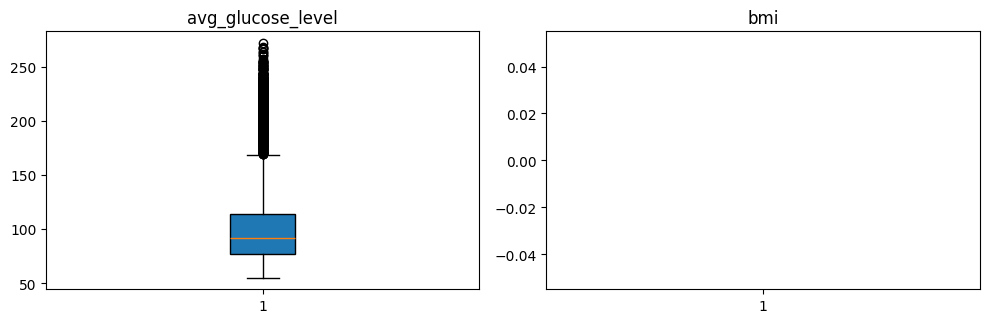

In [35]:
##BOXPLOT DE LAS VARIABLES A UTILIZAR
# Crear subplots
plt.figure(figsize=(15, 12))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)  # 4 filas, 3 columnas
    plt.boxplot(df[col], vert=True, patch_artist=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Para el caso de las variables numericas, se evidencia una gran cantidad de valores extremos en el nivel de glucosa y por otra parte, al tener datos nulos, la columna BMI no gráfica Boxplot, por lo que se tendrá que decidir si eliminar registro o imputar datos.

## Detección de anomalías en variables categóricas
## Revisar
- Utilizar Chi-cuadrado para analizar anomalos
- Estrategias:
  - Frecuencias: identificar categorías con muy bajo soporte (p.ej., < 1%).
  - Chi-cuadrado vs. variable objetivo: residuales estandarizados altos |residual| > 2 señalan celdas inusuales.
  - Limpieza: unificar mayúsculas/minúsculas, trim espacios, mapear faltantes a “Unknown” y agrupar raras en “Other”.
- Heatmap de residuales


[Frecuencias bajas] hypertension (umbral 1.0%):
- Sin categorías raras

[Frecuencias bajas] heart_disease (umbral 1.0%):
- Sin categorías raras

[Frecuencias bajas] smoking_status (umbral 1.0%):
- Sin categorías raras

[Chi-cuadrado] hypertension vs stroke: chi2=81.61, dof=1, p=1.662e-19


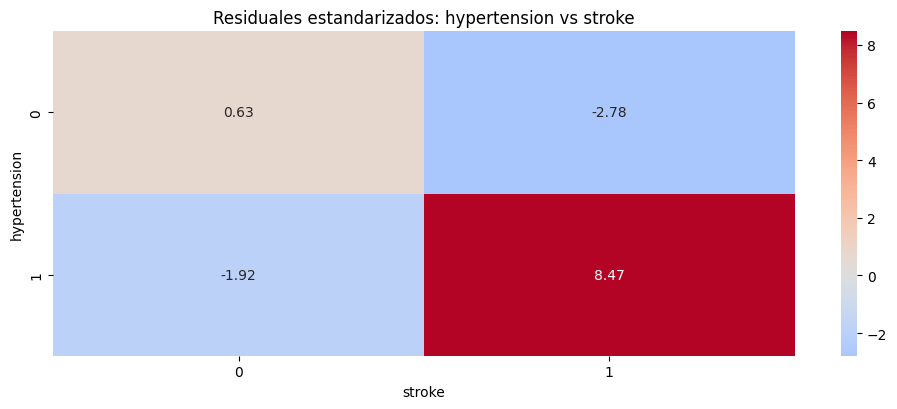


[Chi-cuadrado] heart_disease vs stroke: chi2=90.26, dof=1, p=2.089e-21


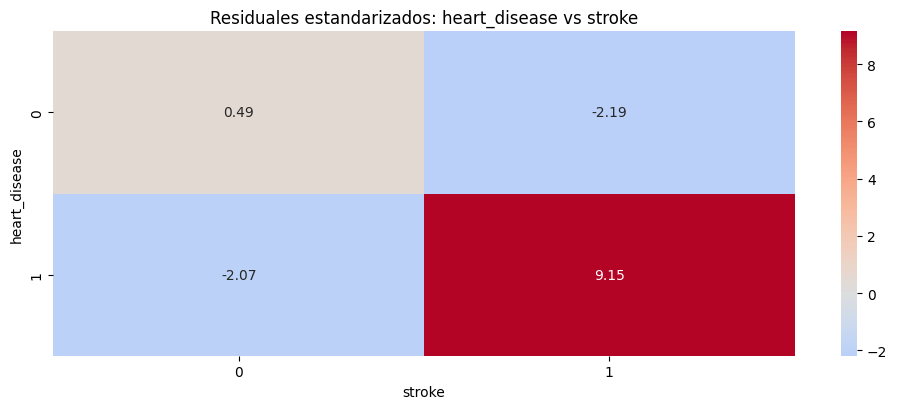


[Chi-cuadrado] smoking_status vs stroke: chi2=29.15, dof=3, p=2.085e-06


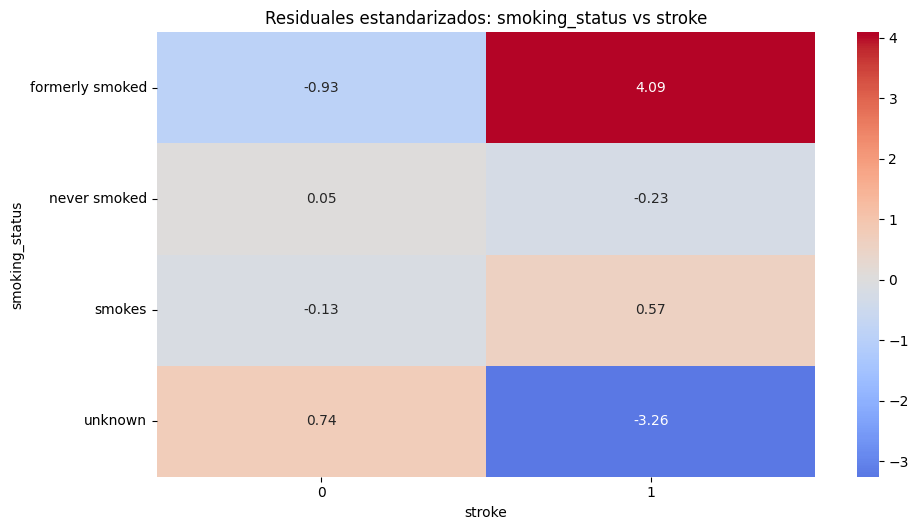

In [36]:


# Asegurar limpieza básica en smoking_status
if 'smoking_status' in df.columns:
    df['smoking_status'] = (
        df['smoking_status']
        .astype('string')
        .str.strip()
        .str.lower()
        .fillna('unknown')
        .replace({'nan': 'unknown', '': 'unknown'})
    )

cat_cols_to_check = ['hypertension', 'heart_disease', 'smoking_status']
if 'stroke' in df.columns:
    target = 'stroke'
else:
    target = None

# 1) Categorías raras por columna (soporte mínimo)
min_support = 0.01  # 1%
rare_report = {}
for col in cat_cols_to_check:
    counts = df[col].value_counts(dropna=False)
    pct = counts / len(df)
    rare = pct[pct < min_support]
    rare_report[col] = rare
    print(f"\n[Frecuencias bajas] {col} (umbral {min_support*100:.1f}%):")
    if rare.empty:
        print("- Sin categorías raras")
    else:
        print(rare.to_frame('proporcion'))

# 2) Prueba chi-cuadrado y mapa de residuales estandarizados (si hay objetivo)
if target is not None:
    for col in cat_cols_to_check:
        ct = pd.crosstab(df[col], df[target])
        chi2, p, dof, expected = chi2_contingency(ct)
        resid = (ct - expected) / np.sqrt(expected)

        print(f"\n[Chi-cuadrado] {col} vs {target}: chi2={chi2:.2f}, dof={dof}, p={p:.4g}")
        plt.figure(figsize=(6 + 2*ct.shape[1], 3 + 0.6*ct.shape[0]))
        sns.heatmap(resid, annot=True, fmt='.2f', center=0, cmap='coolwarm')
        plt.title(f'Residuales estandarizados: {col} vs {target}')
        plt.ylabel(col)
        plt.xlabel(target)
        plt.tight_layout()
        plt.show()



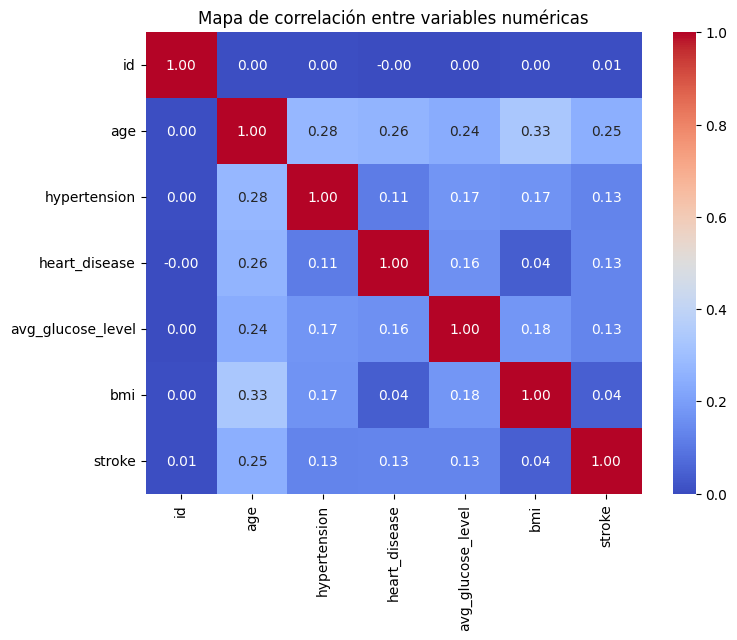

In [37]:
# Análisis de correlación
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de correlación entre variables numéricas")
plt.show()


In [38]:
# Eliminamos columnas irrelevantes como id, tipo de reisdnecia y si estuvo casado 
df = df.drop(columns=['id'])
df = df.drop(columns=['Residence_type'])
df = df.drop(columns=['ever_married'])

# Imputamos valores faltantes en 'bmi' con la mediana
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df['bmi'] = imputer.fit_transform(df[['bmi']])

# Codificamos variables categóricas
categorical_cols = ['gender', 'work_type', 'smoking_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [39]:
from imblearn.over_sampling import SMOTE

X = df_encoded.drop(columns=['stroke'])
y = df_encoded['stroke']

# Forzar todo X a numérico
X = X.astype(float)

# Aplicamos SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Resumen del balanceo
print("Antes del balanceo:")
print(y.value_counts(normalize=True) * 100)

print("\nDespués del balanceo:")
print(pd.Series(y_resampled).value_counts(normalize=True) * 100)


Antes del balanceo:
stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

Después del balanceo:
stroke
1    50.0
0    50.0
Name: proportion, dtype: float64


In [40]:
# MLP: Split + SMOTE (solo train) + Escalado + Búsqueda (prioriza AUC / balanced accuracy)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, balanced_accuracy_score, 
                             classification_report, confusion_matrix, roc_auc_score,
                             precision_recall_fscore_support, roc_curve)
from imblearn.over_sampling import SMOTE
import numpy as np, time

if 'df_encoded' not in globals():
    raise ValueError("df_encoded no existe. Ejecuta antes el preprocesamiento.")

target = 'stroke'
if target not in df_encoded.columns:
    raise ValueError("No se encontró 'stroke' en df_encoded.")

X = df_encoded.drop(columns=[target]).copy()
y = df_encoded[target].astype(int)

# Asegurar numérico
for c in X.columns:
    if str(X[c].dtype) in ['bool','boolean']:
        X[c] = X[c].astype(int)
X = X.apply(pd.to_numeric, errors='coerce')
if X.isna().any().any():
    for col in X.columns[X.isna().any()]:
        X[col] = X[col].fillna(X[col].median())

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Distribución total (%):", y.value_counts(normalize=True).mul(100).round(2).to_dict())
print("Train antes SMOTE (%):", y_train.value_counts(normalize=True).mul(100).round(2).to_dict())

# SMOTE solo en train
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("Train después SMOTE (%):", y_train_res.value_counts(normalize=True).mul(100).round(2).to_dict())

# Escalado
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test_sc = scaler.transform(X_test)

architecturas = [(32,), (64,), (64,32), (128,64), (128,64,32)]
mejor = {
    'auc': -1,
    'acc': -1,
    'bal_acc': -1,
    'arch': None,
    'modelo': None
}

print("\nEvaluando arquitecturas...")
for arch in architecturas:
    t0 = time.time()
    mlp = MLPClassifier(
        hidden_layer_sizes=arch,
        activation='relu',
        solver='adam',
        alpha=0.0005,
        learning_rate='adaptive',
        max_iter=400,
        early_stopping=True,
        n_iter_no_change=15,
        random_state=42
    )
    mlp.fit(X_train_res, y_train_res)
    y_prob_tmp = mlp.predict_proba(X_test_sc)[:,1]
    y_pred_tmp = (y_prob_tmp >= 0.5).astype(int)
    auc_tmp = roc_auc_score(y_test, y_prob_tmp)
    acc_tmp = accuracy_score(y_test, y_pred_tmp)
    bal_tmp = balanced_accuracy_score(y_test, y_pred_tmp)
    dur = time.time() - t0
    print(f"Arch {arch}: AUC={auc_tmp:.4f} Acc={acc_tmp:.4f} BalAcc={bal_tmp:.4f} Tiempo={dur:.2f}s")
    # Prioriza AUC luego balanced accuracy luego accuracy
    if (auc_tmp > mejor['auc']) or (auc_tmp == mejor['auc'] and bal_tmp > mejor['bal_acc']):
        mejor.update({'auc': auc_tmp, 'acc': acc_tmp, 'bal_acc': bal_tmp, 'arch': arch, 'modelo': mlp})

print(f"\nMejor arquitectura: {mejor['arch']}  AUC={mejor['auc']:.4f}  Acc={mejor['acc']:.4f}  BalAcc={mejor['bal_acc']:.4f}")

# Evaluación final
model = mejor['modelo']
y_prob = model.predict_proba(X_test_sc)[:,1]
y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', zero_division=0)

print(f"\nMétricas (umbral 0.5): Acc={acc:.4f}  BalAcc={bal_acc:.4f}  AUC={auc:.4f}  Precision={prec:.4f}  Recall={rec:.4f}  F1={f1:.4f}")
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte completo:\n", classification_report(y_test, y_pred, digits=4))

# Ajuste de umbral (max Youden)
fpr, tpr, thr = roc_curve(y_test, y_prob)
youden = tpr - fpr
idx = np.argmax(youden)
best_thr = thr[idx]
y_pred_opt = (y_prob >= best_thr).astype(int)
acc_opt = accuracy_score(y_test, y_pred_opt)
bal_opt = balanced_accuracy_score(y_test, y_pred_opt)
prec_opt, rec_opt, f1_opt, _ = precision_recall_fscore_support(y_test, y_pred_opt, average='binary', zero_division=0)

print(f"\nUmbral óptimo (Youden): {best_thr:.4f}  Acc={acc_opt:.4f}  BalAcc={bal_opt:.4f}  Precision={prec_opt:.4f}  Recall={rec_opt:.4f}  F1={f1_opt:.4f}")

if acc < 0.75:
    print("Nota: accuracy < 75% (improbable dado el desbalance). Revisar pipeline si ocurre.")
print("Primeras probabilidades:", np.round(y_prob[:10],4))

Distribución total (%): {0: 95.13, 1: 4.87}
Train antes SMOTE (%): {0: 95.13, 1: 4.87}
Train después SMOTE (%): {0: 50.0, 1: 50.0}

Evaluando arquitecturas...
Arch (32,): AUC=0.7739 Acc=0.8464 BalAcc=0.6726 Tiempo=0.57s
Arch (32,): AUC=0.7739 Acc=0.8464 BalAcc=0.6726 Tiempo=0.57s
Arch (64,): AUC=0.7794 Acc=0.8376 BalAcc=0.6300 Tiempo=0.75s
Arch (64,): AUC=0.7794 Acc=0.8376 BalAcc=0.6300 Tiempo=0.75s
Arch (64, 32): AUC=0.7817 Acc=0.8405 BalAcc=0.5936 Tiempo=1.13s
Arch (64, 32): AUC=0.7817 Acc=0.8405 BalAcc=0.5936 Tiempo=1.13s
Arch (128, 64): AUC=0.7490 Acc=0.8425 BalAcc=0.5567 Tiempo=1.94s
Arch (128, 64): AUC=0.7490 Acc=0.8425 BalAcc=0.5567 Tiempo=1.94s
Arch (128, 64, 32): AUC=0.7518 Acc=0.8855 BalAcc=0.5699 Tiempo=2.20s

Mejor arquitectura: (64, 32)  AUC=0.7817  Acc=0.8405  BalAcc=0.5936

Métricas (umbral 0.5): Acc=0.8405  BalAcc=0.5936  AUC=0.7817  Precision=0.1103  Recall=0.3200  F1=0.1641

Matriz de confusión:
 [[843 129]
 [ 34  16]]

Reporte completo:
               precision    re

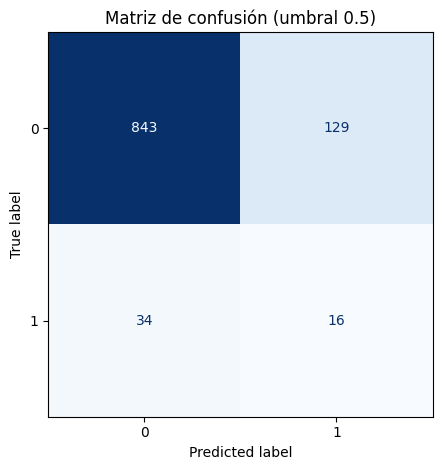

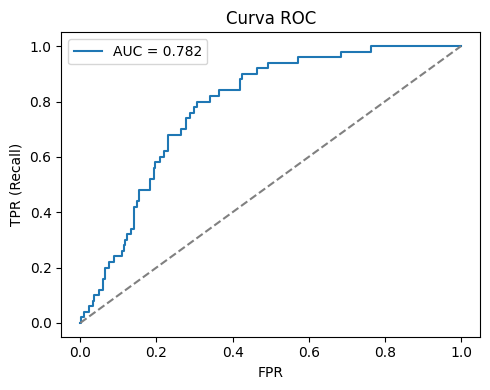

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc

# Asegurar que existen y_prob, y_pred, y_test
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues", colorbar=False)
plt.title("Matriz de confusión (umbral 0.5)")
plt.tight_layout()
plt.show()

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("FPR")
plt.ylabel("TPR (Recall)")
plt.title("Curva ROC")
plt.legend()
plt.tight_layout()
plt.show()


Top 10 variables (Δ AUC):


,feature,importance_mean,importance_std
0,age,0.223128,0.039728
4,bmi,0.030709,0.022358
11,smoking_status_never smoked,0.023199,0.011232
3,avg_glucose_level,0.021326,0.008886
10,work_type_children,0.011484,0.010815
13,smoking_status_unknown,0.011425,0.008107
9,work_type_Self-employed,0.010543,0.006869
12,smoking_status_smokes,0.007964,0.008995
7,work_type_Never_worked,0.005332,0.013264
5,gender_Male,0.001915,0.007444


C:\Users\PC\AppData\Local\Temp\ipykernel_21628\3845224976.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=imp_df.head(10), x='importance_mean', y='feature', palette='viridis')


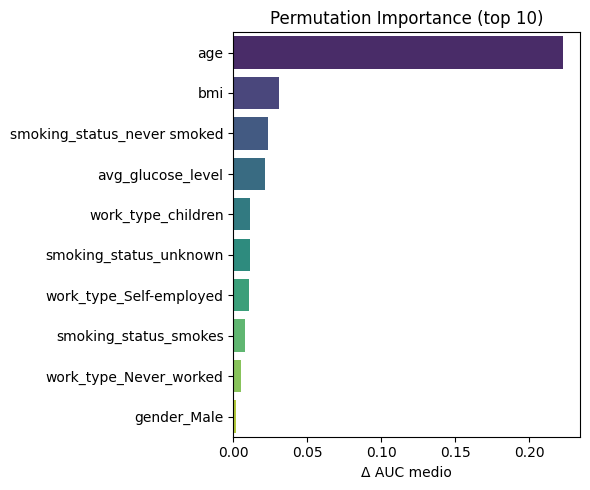

In [42]:
from sklearn.inspection import permutation_importance
import pandas as pd

r = permutation_importance(model, X_test_sc, y_test,
                           n_repeats=15, random_state=42,
                           scoring='roc_auc')
imp_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': r.importances_mean,
    'importance_std': r.importances_std
}).sort_values('importance_mean', ascending=False)

print("Top 10 variables (Δ AUC):")
display(imp_df.head(10))

plt.figure(figsize=(6,5))
sns.barplot(data=imp_df.head(10), x='importance_mean', y='feature', palette='viridis')
plt.title("Permutation Importance (top 10)")
plt.xlabel("Δ AUC medio")
plt.ylabel("")
plt.tight_layout()
plt.show()